<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Мне нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортирую необходимые библиотеки.

In [34]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

Сохряню таблицу с данными в переменную df. Сделаю значения столбца datetime - индексами.

In [2]:
try:  
    df = pd.read_csv('C:/taxi.csv', parse_dates=[0], index_col=[0])
except OSError as e:
    df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
display(df.head())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Посмотрю, что представляют из себя данные.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Выбивающихся значений в данных нет, пропуски также отсутствуют.

Проверю хронологический порядок данных.

In [5]:
df = df.sort_index() 
print(df.index.is_monotonic)

True


Выполню ресемплирование данных по одному часу.

In [6]:
df = df.resample('1H').sum()

### Вывод

Данные находятся в хронологическом порядке, а также ресемплированы по одному часу. Артефактов в данных нет.

Данные полностью готовы к анализу.

## Анализ

Чтобы столбцы 'rolling_mean' и 'std' не остались в основной таблице данных, создам новую путем глубокого копирования.

In [7]:
df_new = df.copy(deep=True)

Напишу функцию для постройки графика скользящего среднего и среднеквадратичного отклонения по каждому месяцу.

In [8]:
def graph(data, x):
# data - таблица с данными, х - размер окна    
    data['rolling_mean'] = data.rolling(x).mean()
    data['std'] = data['num_orders'].rolling(x).std()
    data.plot(figsize=[12,8]);

Построю график по всем данным и графики по месяцам.

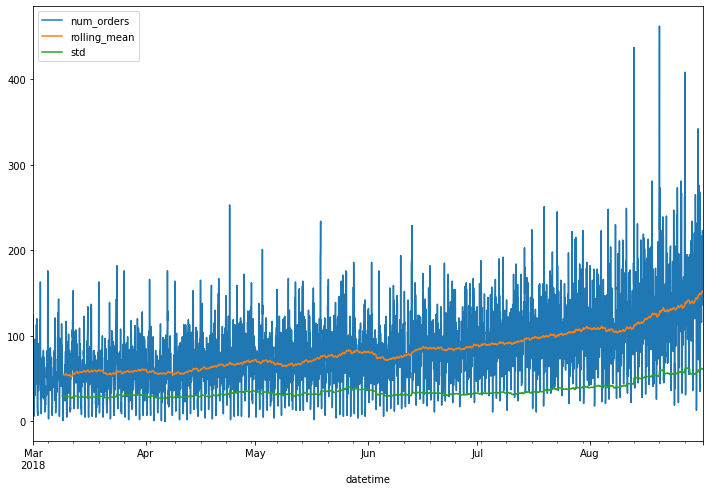

In [9]:
graph(df_new, 200)

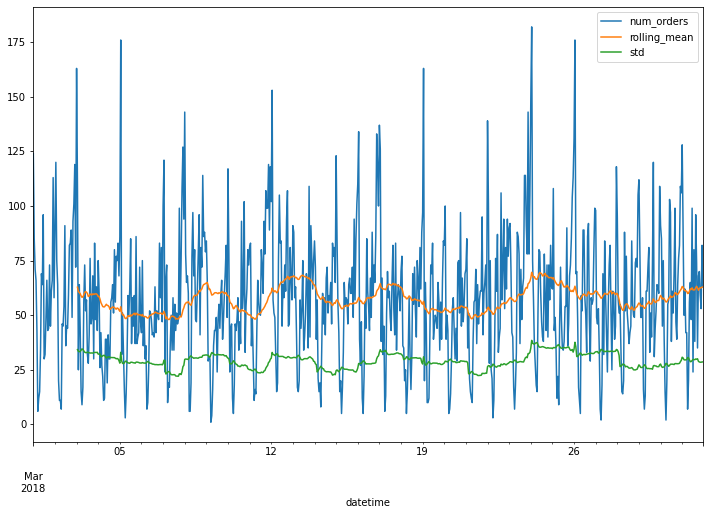

In [10]:
graph(df_new['2018-03'], 50)

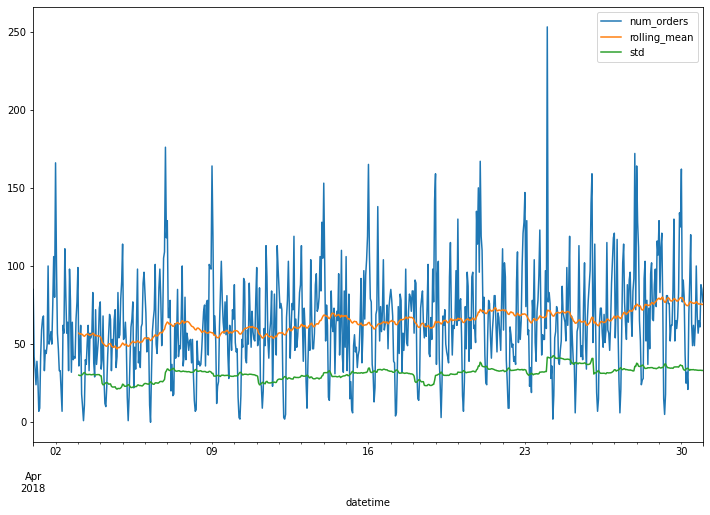

In [11]:
graph(df_new['2018-04'], 50)

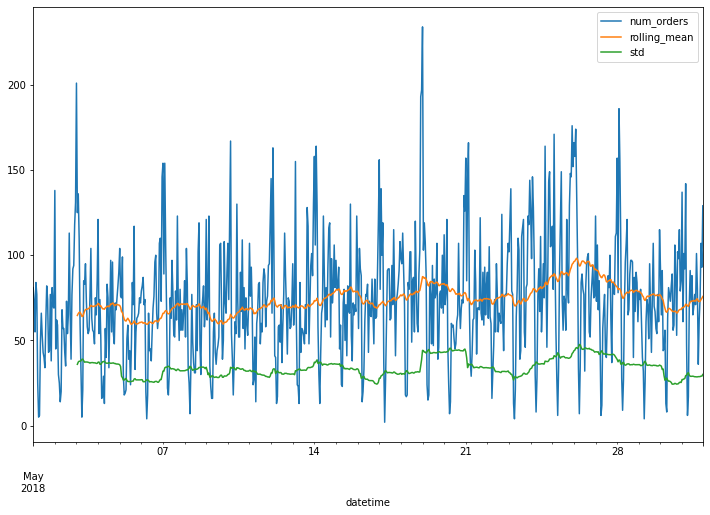

In [12]:
graph(df_new['2018-05'], 50)

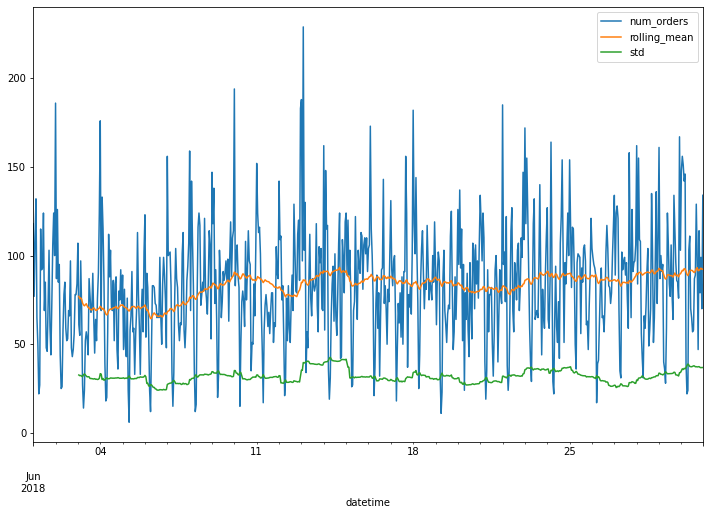

In [13]:
graph(df_new['2018-06'], 50)

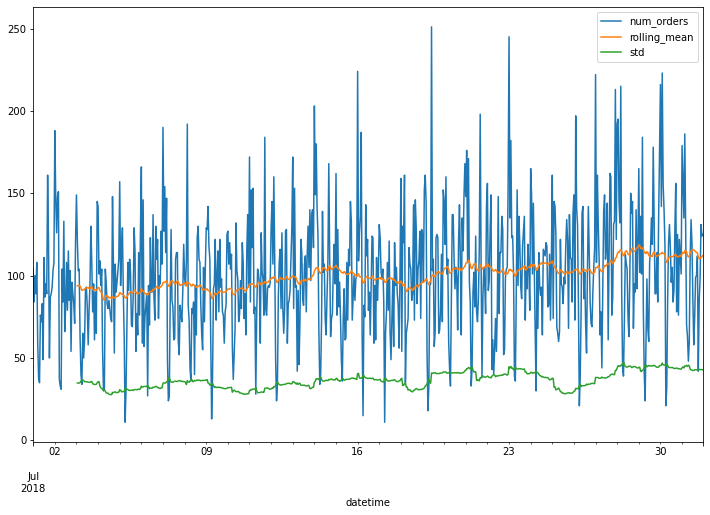

In [14]:
graph(df_new['2018-07'], 50)

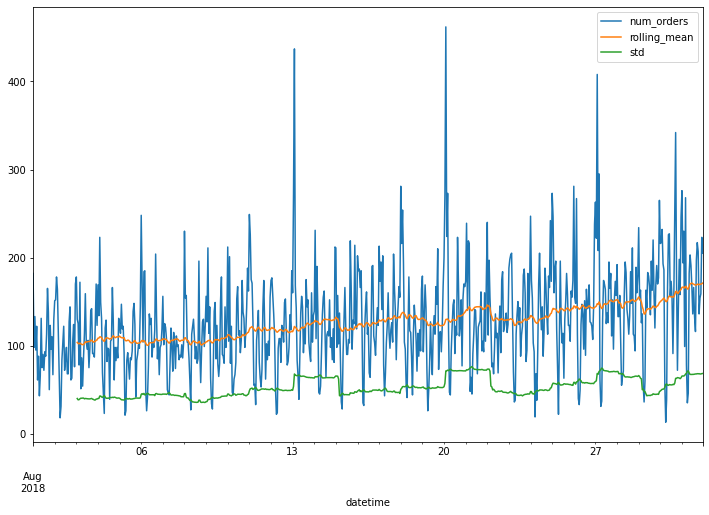

In [15]:
graph(df_new['2018-08'], 50)

Из анализа графиков можно сделать следующие выводы:
- количество заказов такси увеличивается со временем;
- пики заказов приходятся на конец дня, подают к утру и снова растут к вечеру;
- особенно большие пики связаны с выходными днями.

Разложу временной ряд на тренд и сезонную компоненту.

In [18]:
def decomp(data):
    decomposed = seasonal_decompose(data) 
    plt.figure(figsize=(12,8))
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Trend')
    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca()) 
    plt.title('Seasonality')
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca()) 
    plt.title('Residuals')
    plt.tight_layout()

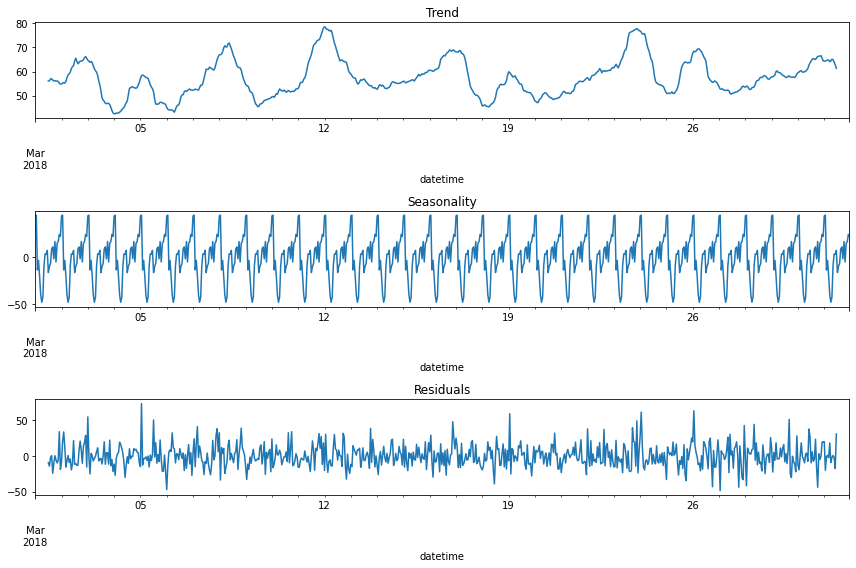

In [19]:
decomp(df['2018-03'])

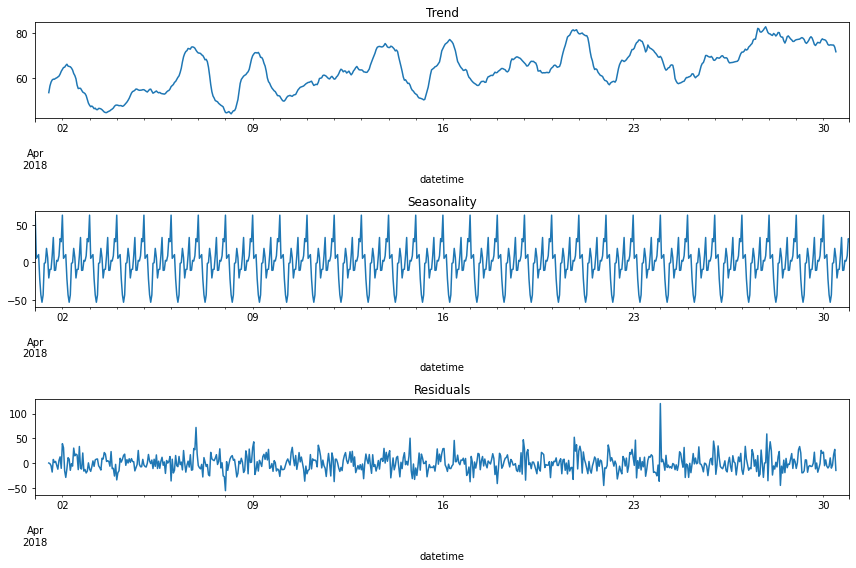

In [20]:
decomp(df['2018-04'])

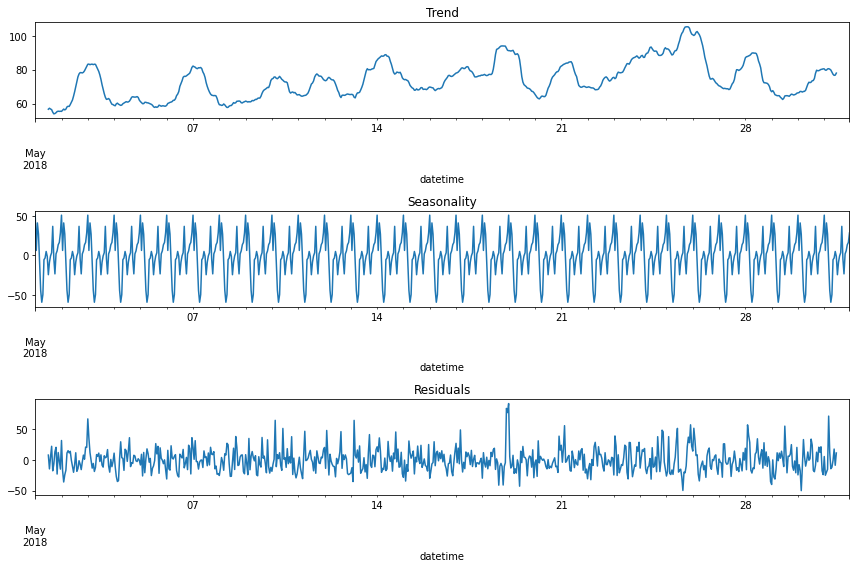

In [21]:
decomp(df['2018-05'])

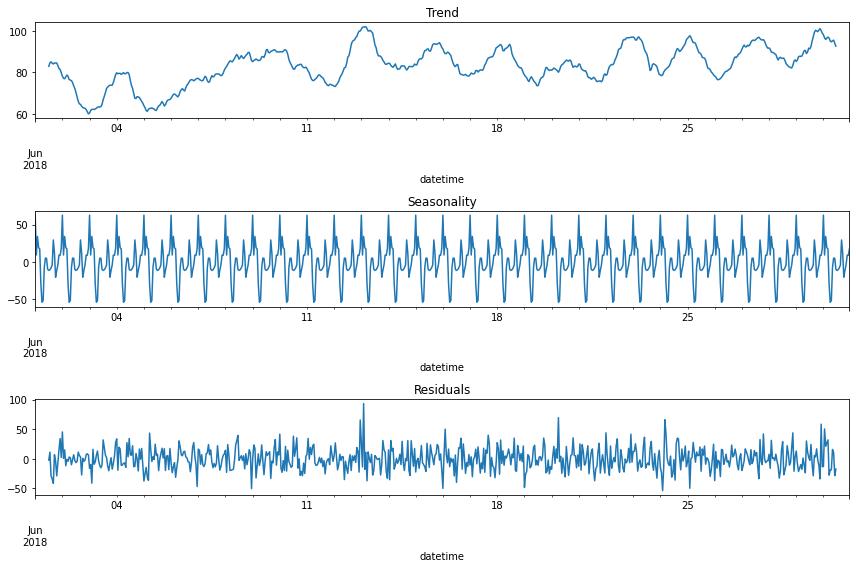

In [22]:
decomp(df['2018-06'])

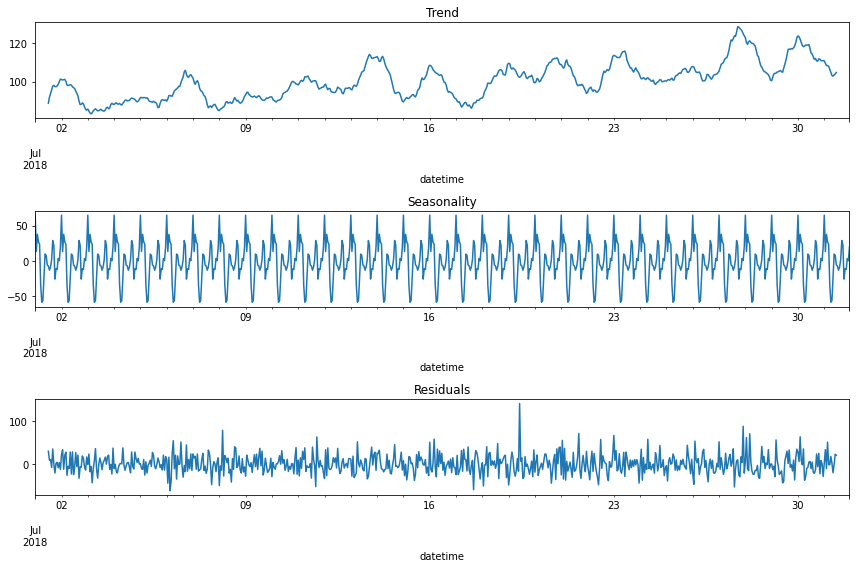

In [23]:
decomp(df['2018-07'])

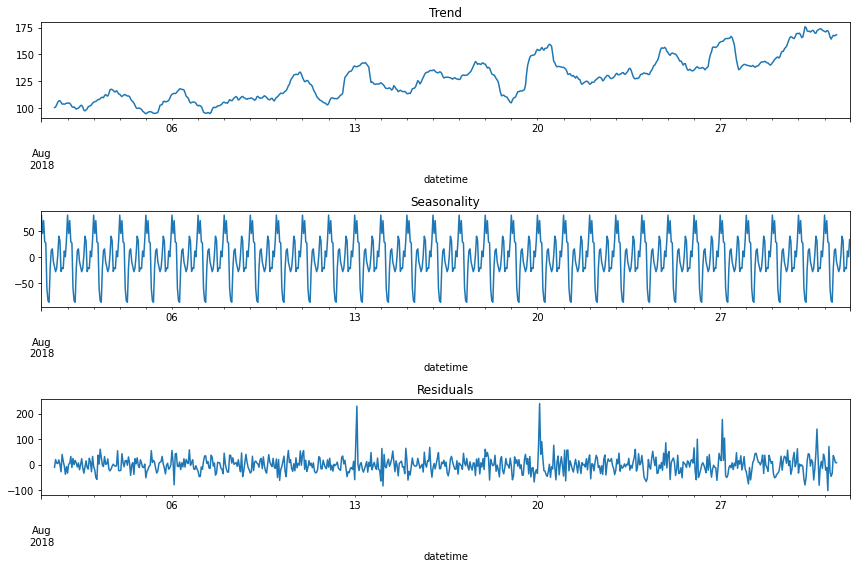

In [24]:
decomp(df['2018-08'])

График Trend говорит о росте заказов такси от весны к осени.

График Seasonality говорит об одинаковой цикличности получения заказзов на поездки.

График Residuals представляет собой шум.

### Вывод

Анализ данных дал следующие резельтаты:
- количество заказов такси от весны к осени возрастает каждый месяц; 
- заказы имеют циклические характер - вечером заказов больше, чем утром.

## Обучение

Определю наилучшие гиперпараметры для следующих моделей:
- LinearRegression;
- Ridge;
- DecisionTreeClassifier;
- CatBoostRegressor;
- LGBMRegressor.

Определю необходимые признаки для создания модели.

Параметры max_lag и rolling_meanукажу равным 12 по причине того, что 12 часов - разница между днем и ночью.

In [32]:
df_lag = df.copy(deep=True)

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(df_lag, 24, 24)
display(df_lag.head())

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разделю генеральною совокупность на тренировочную и тестовую выборки.

In [33]:
train, test = train_test_split(df_lag, shuffle=False, test_size=0.1, random_state=12345)
train = train.dropna()

train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']
test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

print('Размер обучающей выборки', train_features.shape[0])
print('Размер тестовой выборки', test_features.shape[0])

Размер обучающей выборки 3950
Размер тестовой выборки 442


###  LinearRegression

Подберу наилучшие гиперараметры для LinearRegression.

In [36]:
%%time

model_lin = LinearRegression()
param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
tscv = TimeSeriesSplit(n_splits=2)
search = GridSearchCV(model_lin, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=tscv)
result = search.fit(train_features, train_target)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -21.519050389437687
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
CPU times: user 1.27 s, sys: 1.8 s, total: 3.07 s
Wall time: 3.02 s


### Ridge

Подберу наилучшие гиперараметры для Ridge.

In [37]:
%%time

model = Ridge()
tscv = TimeSeriesSplit(n_splits=2)
param = {
    'solver':['svd', 'cholesky', 'lsqr'],
    'alpha': [1e-3, 1e-1, 1],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=tscv)
result = search.fit(train_features, train_target)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -21.52313066609543
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': False, 'normalize': True, 'solver': 'cholesky'}
CPU times: user 4.12 s, sys: 6.38 s, total: 10.5 s
Wall time: 10.5 s


### DecisionTreeClassifier

Подберу наилучшие гиперараметры для DecisionTreeClassifier.

In [38]:
%%time

parametrs = {'max_leaf_nodes': list(range(10, 20)),          
             'ccp_alpha': [0.1, 0.001],            
             'max_depth': list(range(2, 6)),             
             'criterion': ['gini', 'entropy']             
            }

clf = DecisionTreeClassifier(random_state=12345)
tscv = TimeSeriesSplit(n_splits=2)
grid = GridSearchCV(clf, parametrs, cv=tscv)

grid.fit(train_features, train_target)

display(grid.best_params_)

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 14}

CPU times: user 15.4 s, sys: 0 ns, total: 15.4 s
Wall time: 15.4 s


### CatBoostRegressor

Подберу наилучшие гиперараметры для CatBoostRegressor.

In [39]:
%%time

regressor = CatBoostRegressor() 

hyperparams = [{'learning_rate':[0.01, 0.1, 0.5, 0.8],
                'iterations': [10, 20, 40],
                'depth': [2, 4, 6],
                'random_state':[12345],
                'l2_leaf_reg': [1, 3, 5],
                'verbose':[False]}]

clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
clf.fit(train_features, train_target)

print(clf.best_params_)

{'depth': 6, 'iterations': 40, 'l2_leaf_reg': 5, 'learning_rate': 0.5, 'random_state': 12345, 'verbose': False}
CPU times: user 48.4 s, sys: 1.79 s, total: 50.2 s
Wall time: 2min 50s


### LGBMRegressor

Подберу наилучшие гиперараметры для LGBMRegressor.

In [40]:
%%time

regressor = LGBMRegressor() 
hyperparams = [{'num_leaves':[10, 200], 
                'learning_rate':[0.01, 0.1, 0.2, 0.3],
                'min_data_in_leaf':[100, 110],
                'max_depth': [1, 12],
                'random_state':[12345]}]

clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
clf.fit(train_features, train_target)

print(clf.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGB

### Вывод

Для каждой модели получил наилучшие гиперпараметры. Приступлю к проверке моделей на тестовой выборке.

## Тестирование

Проведу тестирование полученных моделей на тестовой выборке.

### LinearRegression

Вычислю RMSE для LinearRegression.

45.53695986841016
CPU times: user 99.5 ms, sys: 107 ms, total: 207 ms
Wall time: 195 ms


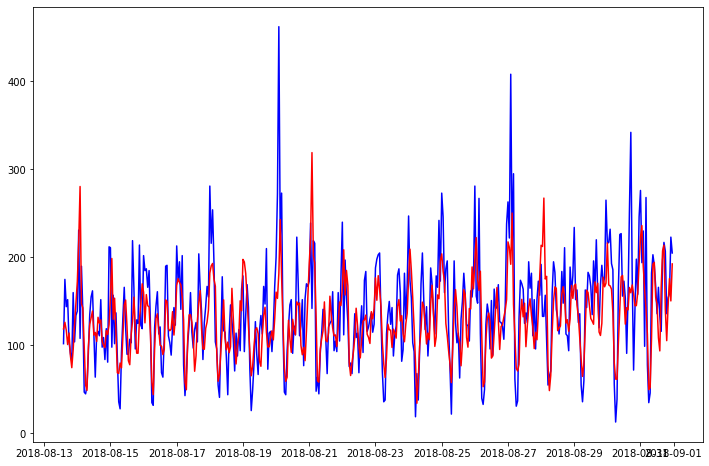

In [48]:
%%time

model_lin = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
model_lin.fit(train_features, train_target)
predictions_lin = model_lin.predict(test_features)
RMSE_lin = mean_squared_error(test_target, predictions_lin) **0.5  
print(RMSE_lin)

plt.figure(figsize=(12,8));
plt.plot(test_target.index, 
         test_target, 
         'b-', 
         test_target.index, 
         predictions_lin,
         'r-');

### Ridge

Вычислю RMSE для Ridge.

45.52933652315752
CPU times: user 78.3 ms, sys: 128 ms, total: 206 ms
Wall time: 204 ms


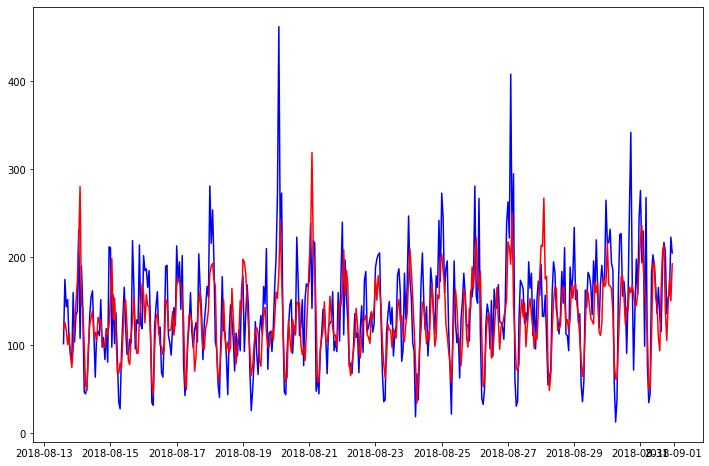

In [49]:
%%time

model_rid = Ridge(alpha=0.001, fit_intercept=False, normalize=True, solver='cholesky')
model_rid.fit(train_features, train_target)
predictions_rid = model_rid.predict(test_features)
RMSE_rid = mean_squared_error(test_target, predictions_rid) **0.5  
print(RMSE_rid)

plt.figure(figsize=(12,8));
plt.plot(test_target.index, 
         test_target, 
         'b-', 
         test_target.index, 
         predictions_rid,
         'r-');

### DecisionTreeClassifier

Вычислю RMSE для DecisionTreeClassifier.

57.50235092577477
CPU times: user 177 ms, sys: 0 ns, total: 177 ms
Wall time: 175 ms


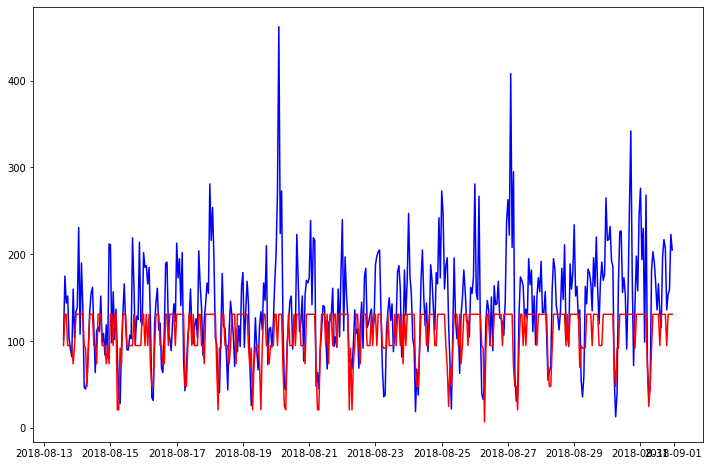

In [50]:
%%time

model_dec = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4, max_leaf_nodes=14, random_state=12345)
model_dec.fit(train_features, train_target)
predictions_dec = model_dec.predict(test_features)
RMSE_dec = mean_squared_error(test_target, predictions_dec) **0.5  
print(RMSE_dec)

plt.figure(figsize=(12,8));
plt.plot(test_target.index, 
         test_target, 
         'b-', 
         test_target.index, 
         predictions_dec,
         'r-');

### CatBoostRegressor

Вычислю RMSE для CatBoostRegressor.

39.789829510478214
CPU times: user 252 ms, sys: 12.3 ms, total: 264 ms
Wall time: 452 ms


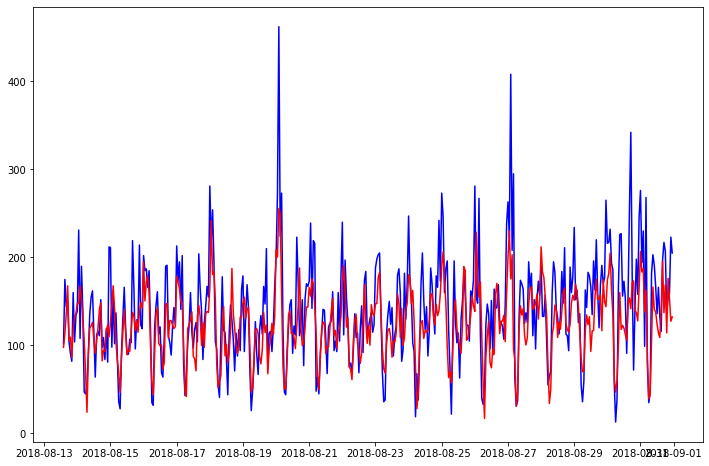

In [57]:
%%time

model_cat = CatBoostRegressor(depth=6,                            
                              iterations=40,
                              l2_leaf_reg=5,
                              learning_rate=0.5,
                              verbose=False,
                              random_state=12345)
model_cat.fit(train_features, train_target)
predictions_cat1 = model_cat.predict(test_features)
RMSE_cat = mean_squared_error(test_target, predictions_cat) **0.5  
print(RMSE_cat)

plt.figure(figsize=(12,8));
plt.plot(test_target.index, 
         test_target, 
         'b-', 
         test_target.index, 
         predictions_cat1,
         'r-');

### LGBMRegressor

Вычислю RMSE для LGBMRegressor.

[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
43.71359348959781
CPU times: user 1.02 s, sys: 19.8 ms, total: 1.04 s
Wall time: 978 ms


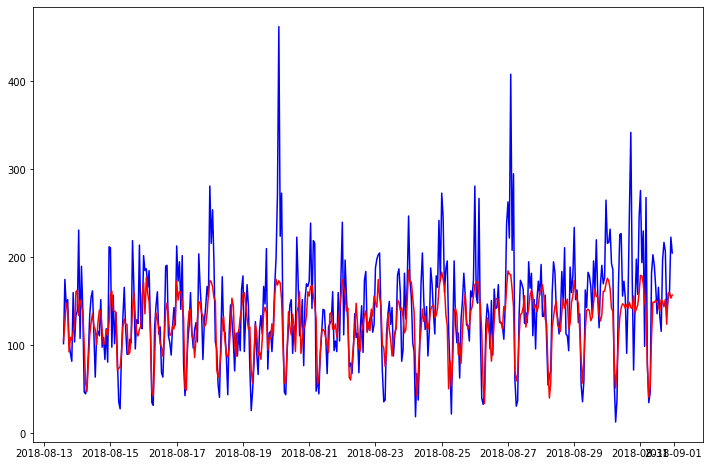

In [58]:
%%time

model_light = LGBMRegressor(max_depth=12,
                            min_data_in_leaf=110,
                            learning_rate=0.1,
                            num_leaves=200,
                            random_state=12345)
model_light.fit(train_features, train_target)
predictions_light = model_light.predict(test_features)
RMSE_light = mean_squared_error(test_target, predictions_light) **0.5  
print(RMSE_light)

plt.figure(figsize=(12,8));
plt.plot(test_target.index, 
         test_target, 
         'b-', 
         test_target.index, 
         predictions_light,
         'r-');

### Вывод

Сведу полученные метрики RMSE в таблицу.

In [59]:
df = pd.DataFrame({'name': ['LinearRegression', 'Ridge', 'DecisionTreeClassifier', 'CatBoostRegressor', 'LGBMRegressor'],
                   'RMSE': [45.54, 45.53, 57.5, 39.79, 43.71]})
df.sort_values(by=['RMSE'])

,name,RMSE
3,CatBoostRegressor,39.79
4,LGBMRegressor,43.71
1,Ridge,45.53
0,LinearRegression,45.54
2,DecisionTreeClassifier,57.50


Наилучший результат показала модель CatBoostRegressor, наихудший модель DecisionTreeClassifier.

## Общий вывод

В ходе исследования я проанализировл временной ряд заказов такси.

Для обучения моделей предсказания я выделил новые признаки и добавил их в исходную таблицу.

На основании тестирования различных моделей я определил наилучшую - CatBoostRegressor, со следующими гиперпараметрами

- depth=6,                            
- iterations=40,
- l2_leaf_reg=5,
- learning_rate=0.5,
- verbose=False,
- random_state=12345.